# Koneoppiminen: T1: k lähintä naapuria eli kNN Luokittelija (max. 8p)

Tutki tehtävää varten myös seuraavat scikit Learn -manuaalisivut:
* [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## Tehtävä 1.0: Anna Repositoryn oikeudet opettajalle

Aseta opettajalle pääsy repositorioon vähintään **Developer**-tasolle.

Muista myös kirjoittaa omat tietosi alla olevaan soluun.

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Jere Soininen'
student_id = 'AB6802'

## Tehtävä 1.1
### Aihe: Datan esikäsittely (2 pistettä)

1. Tutustu **aineistoon** (=*dataset*) *Congressional Voting Records Data Set* osoitteessa [https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records).

2. Lataa aineisto osoitteesta [https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/](https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/). Tallenna datatiedosto samaan hakemistoon, jossa tämä Jupyter Notebook -tiedosto sijaitsee. 

3. Lataa aineisto Pandasin DataFrame-luokan muuttujaan. Aseta myös sarakkeiden nimet aineiston dokumentaation "Attribute Information" -osion mukaisesti. Uudelleen nimeä luokkamuuttuja (puoluesarake) nimikkeellä `'party'`.

4. Esikäsittele aineisto:
  * Aineistossa ``y == yes, n == no, ? == not answered``.
  * Muuta y- ja n-vastaukset numeerisiksi arvoiksi. (``y=1, n=-1``)
  * Korvaa myös kysymysmerkein merkityt not answered/ei vastausta -arvot. (``? = 0``)

In [2]:
# TODO: Kirjoita toteutuksesi tähän soluun. Tallenna vastauksesi df-muuttujaan.
import pandas as pd
#df = pd.DataFrame({1:['1']})  # TODO: Tämän muuttujan alustuksen voi poistaa, kun aloittaa tehtävän tekemisen

# TODO: Aineiston lataaminen. Huomaa, että .data-tiedostossa ei ole otsikkoriviä.
df = pd.read_csv('../../data/congressional+voting+records/house-votes-84.data', header=None)

# TODO: Sarakkeiden nimeäminen.
# Aseta sarakkeiden nimet dokumentaatiosta
columns = [
    'party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
    'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
    'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback',
    'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports',
    'export-administration-act-south-africa'
]
df.columns = columns

# Uudelleen nimeä luokkamuuttuja 'party'-nimiseksi
df.rename(columns={'Class Name': 'party'}, inplace=True)
            
# TODO: Arvojen muuttaminen numeerisiksi
def convert_values(value):
    if value == 'y':
        return 1
    elif value == 'n':
        return -1
    else:
        return value

# TODO: Tyhjien kenttien korvaaminen
df.replace('?', 0, inplace=True)

df = df.map(convert_values)


In [3]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 

# TODO: Tallenna DataFrame df-muuttujaan.
print(f'Number of rows: {len(df)}')
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

# TODO: Poista kommentit kahdesta seuraavasti rivistä
print(f'anti-satellite-test-ban unique values: {df["anti-satellite-test-ban"].unique()}')
print(f'export-administration-act-south-africa unique values: {df["export-administration-act-south-africa"].unique()}')

# Tulosta rivien lukumäärä
print(f'Rivien lukumäärä {df.any(axis=1).sum()}')

Number of rows: 435
Columns: Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
First row by position: party                                     republican
handicapped-infants                               -1
water-project-cost-sharing                         1
adoption-of-the-budget-resolution                 -1
physician-fee-freeze                               1
el-salvador-aid                                    1
religious-groups-in-schools                        1
anti-satellite-test-ban                           -1
aid-to-nicaraguan-contras                 

## Tehtävä 1.2
### Aihe: Datan visualisointi (2 pistettä)

Huomaatko kuvan avulla eroa eri puolueiden äänestyskäyttäytymisessä?

Hyödynnä edellisen tehtävän DataFramea. Piirrä aineistosta **heatmap**, jossa näkyvät ensin republikaanit ja sitten demokraatit allekkain. Kongressiedustajat ovat siis riveinä ja lakikysymykset sarakkeina. 

Muista, että selkeään esitystapaan kuuluvat myös nimetyt akselit ja kuvaajan otsikko. 

* Vinkki: voit käyttää esimerkiksi `seaborn`-kirjaston [heatmap-kuvaajaa](https://seaborn.pydata.org/generated/seaborn.heatmap.html).
* Vinkki: on järkevää pudottaa luokkamuuttuja pois tätä kuvaa varten (ks. `df.drop()`).
* Vinkki: väriasteikon saa nimettyä heatmap-kuvaajaan parametrilla `cbar_kws`.

In [4]:
# TODO: Kirjoita toteutuksesi tähän soluun.
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Järjestä rivit.
df_sorted = df.sort_values(by='party', ascending=False)
df_heatmap = df_sorted.drop(columns=['party'])

# TODO: Piirrä heatmap.
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df_heatmap, cmap='coolwarm', cbar_kws={'label': 'Vote'})
ax.set_title('Voting behaviour by party')
ax.set_xlabel('Issue')
ax.set_ylabel('Members (first 168 lines are rep. bottom 267 are dems)')
# Piilotin yticks, sillä kaikki numerot eivät mahtuneet ja kuvaaja oli niiden kanssa sekavampi kuin ilman.
# Tarkastin kuitenkin numeroilla että järjestys on oikea
plt.yticks([])
# Alla on rivi joka piirtää viivan puolueiden väliin. Jätin sen kuitenkin kommentiksi sillä se saattaa
# peittää dataa. Sillä kuitenkin näki selvästi puolue jaon, joka oli tosin jo ilmankin nähtävissä. 
#plt.axhline(y=168, color='black', linewidth=2)

# Tämä estää automaattisen piirtämisen, en tiedä saiko sitä kuvaa tulla tämän solun alle :D
plt.close()

#plt.show()

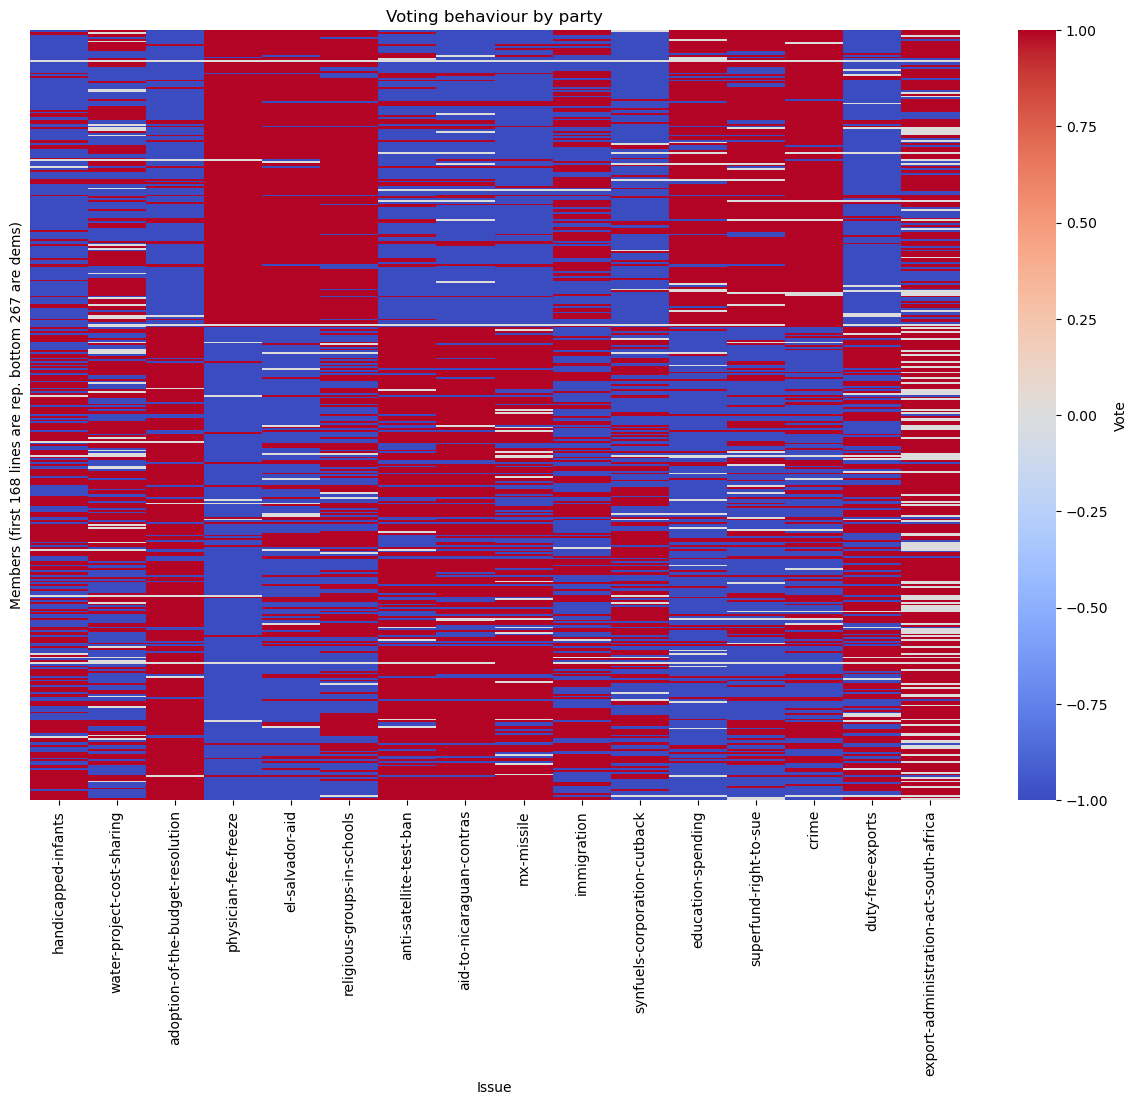

In [5]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# TODO: Tee ratkaisusi siten, että tämän solun tuloksena näkyy alla kaaviokuva.
# TODO: Tallenna kuva muuttujaan ax siten, että ax.figure näyttää sen alla.
ax.figure

## Tehtävä 1.3
### Aihe: kNN-luokittelija (4 pistettä)

Käytä scikit-learn-kirjaston [kNN-luokittelijaa](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) löytääksesi aineistosta kongressiedustaja, joka on lähimpänä haettavaa henkilöä .

Muista pudottaa luokkamuuttuja (`Party`) pois.

Ratkaise tehtävässä alle annetut kysymykset

1. Hae kongressiedustajaa, joka vastaisi `y`-vastauksella kaikkiin lakikysymyksiin. Tallenna löydetystä kongressiedustajasta seuraavat tiedot:
  * mitä puoluetta lähinnä hän on: `yes_man_party`
  * millä todennäköisyydellä hän tätä puoluetta edustaa: `yes_man_proba`
  
2. Hae kongressiedustaja, joka vastaisi lakikysymyksiin seuraavasti: `y,y,y,n,n,n,n,y,y,n,y,n,n,y,y,y`.
  * Tallenna vastaukset vastaaviin muuttujiin `mystery_man_proba` (todennäköisyys) ja `mystery_man_party` (puolue).

3. Hae kongressiedustajaa, joka on 100 % varmuudella rebuplikaani-puolueen jäsen:.
  * Tallenna vastaukset vastaaviin muuttujiin `re_man_proba` (todennäköisyys) ja `re_man_party` (puolue).

**Vinkki**: kun luot kaikkiin `y-`vastauksella vastanneen henkilön vektorin, se tyyppi pitää olla lista listoista: esim. , `[[1,1,1,1...,1]]`.

**Vinkki**: muista pudottaa luokkamuuttuja pois kouluttaessasi luokittelijaa.

In [6]:
# TODO: Kirjoita toteutuksesi tähän soluun.
yes_man_party = myst_man_party = re_man_party = None
yes_man_proba = myst_man_proba = re_man_proba = None

from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = df.drop(columns=['party'])
y = df['party']

y = y.map({'republican': 1, 'democrat': 0})

# Create the kNN classifier and fit it to the training data
# k määrää on hauska kokeilla moneen suuntaan, vielä on kuitenki hahmottamista mikä on oikeasti paras
# molempia puolueita saa vastaukseksi kun vaihtelee vaikuttavien naapureiden määrää
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X, y)

# ym_ans = 1 * X koluminien määrä eli 16 * 1
yes_man_answers = [1] * X.shape[1]
# Sijoittaa etsittävät vastaukset Dataframeen?
yes_man = pd.DataFrame([yes_man_answers], columns=X.columns)

# knn.predict yrittää ennustaa aktuaalista luokkaa (palauttaa yhden arvon indeksiin 0)
# käyttämällä annettuja yes_man vastauksia ja vertaamalla niitä olemassa oleviin havaintoihin.
# Kun se löytää k lähimmät naapurit niin se saa "sijoituksen"/arvon ja knn tekee "ennustuksen" ???
# Malleissa tämä oli jotenkin helpompi hahmottaa mutta kyllä tämä tästä
yes_man_party = knn.predict(yes_man)[0]
yes_man_proba = knn.predict_proba(yes_man)

# mm vastaukset
mystery_man_answers = [1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
# Sijoittaa etsittävät vastaukset Dataframeen?
mystery_man = pd.DataFrame([mystery_man_answers], columns=X.columns)

# # knn.predict yrittää ennustaa aktuaalista luokkaa (palauttaa yhden arvon indeksiin 0)
# käyttämällä annettuja myst_man vastauksia
myst_man_party = knn.predict(mystery_man)[0]
myst_man_proba = knn.predict_proba(mystery_man)

# ennustaa kaikkien edustajien puolueiden todennäköisyydet
proba = knn.predict_proba(X)

# Hae indeksi, jossa republikaanien todennäköisyys on suurin, 0 = dem
republican_index = proba[:, 1].argmax()

# Hae puolue ja todennäköisyys
re_man_party = y.iloc[republican_index]
re_man_proba = proba[republican_index][1]

# Muutetaan puoluearvot takaisin merkkijonoiksi, tämä ei ole ehkä optimaalista mutta ollut tarpeeksi
# kauan tämän kimpussa :D
party_mapping = {1: 'republican', 0: 'democrat'}

yes_man_party = party_mapping[yes_man_party]
myst_man_party = party_mapping[myst_man_party]
re_man_party = party_mapping[re_man_party]

In [7]:
 # Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän.

# TODO: Tallenna kongressiedustajan tiedot mainittuihin muuttujiin.
print(f"yes man: {yes_man_party} {yes_man_proba}")
print(f"mystery man: {myst_man_party} {myst_man_proba}")
print(f"rebuplican man: {re_man_party} {re_man_proba}")


yes man: democrat [[0.625 0.375]]
mystery man: democrat [[1. 0.]]
rebuplican man: republican 1.0
